In [1]:
import cv2

from tensordoc.utils.visualize import visualize_image

from layoutparser import draw_box
from PIL import Image

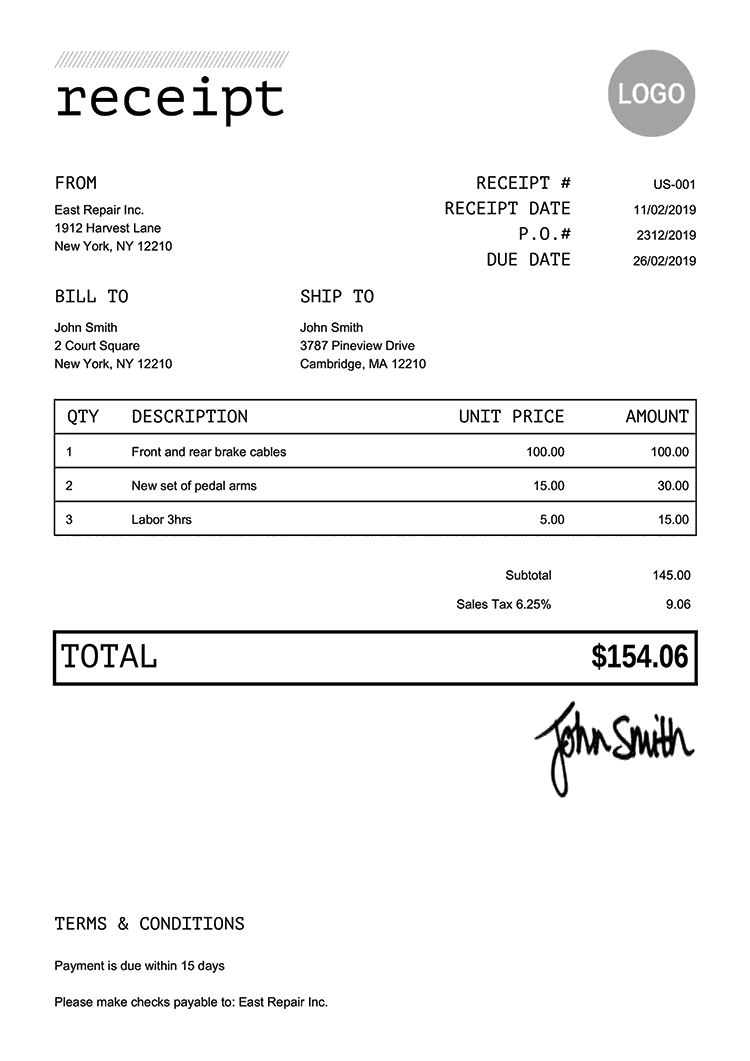

In [2]:
image = cv2.imread("./data/sample.png")
visualize_image(image)

In [3]:
from tensordoc.table_detector import TableDetectorFactory, TableDetectorType
from tensordoc.table_detector import TableSegmentationFactory, TableSegmentationType


Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when init

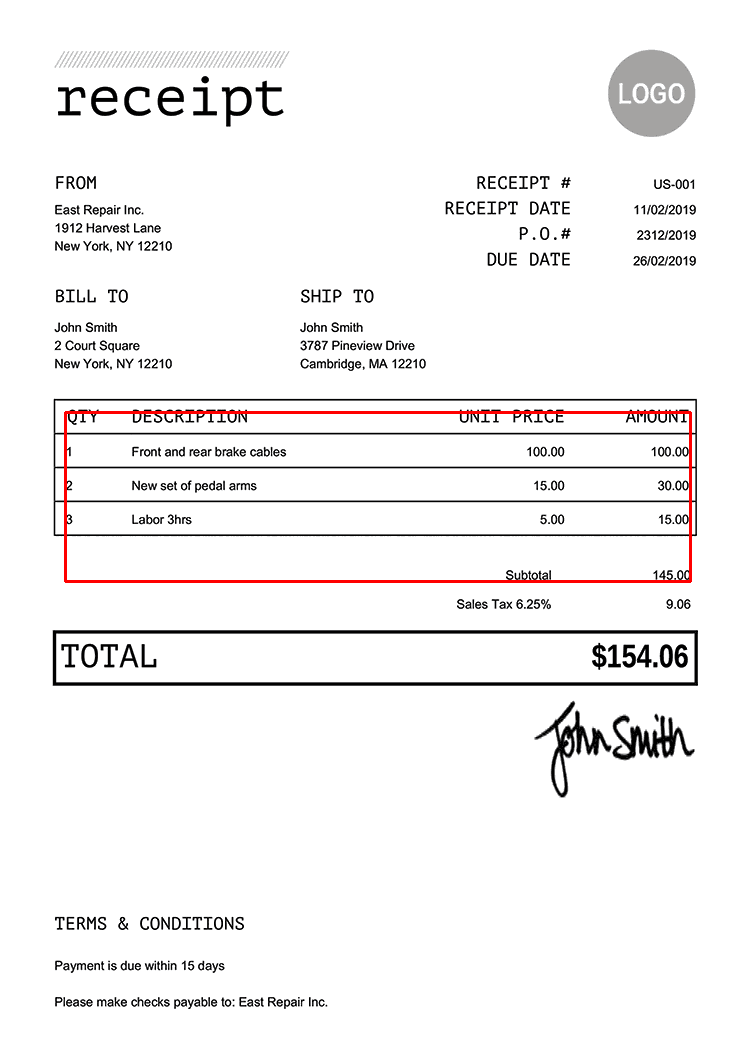

In [4]:
table_detector = TableDetectorFactory.get_table_detector(TableDetectorType.TABLE_TRANSFORMER)
table_segmentation = TableSegmentationFactory.get_table_segmentation(TableSegmentationType.TABLE_TRANSFORMER)

table = table_detector.process(image)


draw_box(image, table, box_width=3)

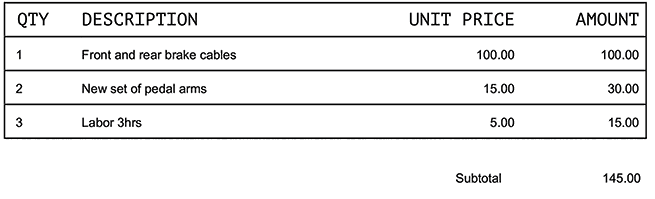

In [5]:
padded_image = table.pad(15, 15, 15, 15)
cropped_image = padded_image.crop_image(image)
table_image = Image.fromarray(cropped_image[0])
table_image

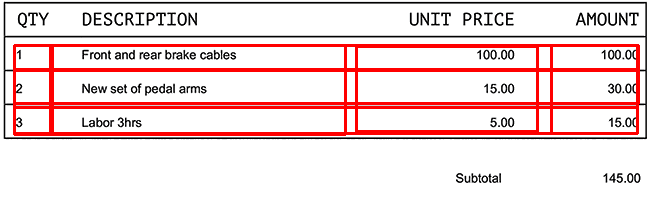

In [6]:
table_blocks = table_segmentation.process(cropped_image[0])
table_segments = [b for b in table_blocks if b.type != "Table"]

draw_box(table_image, table_segments, box_width=3)

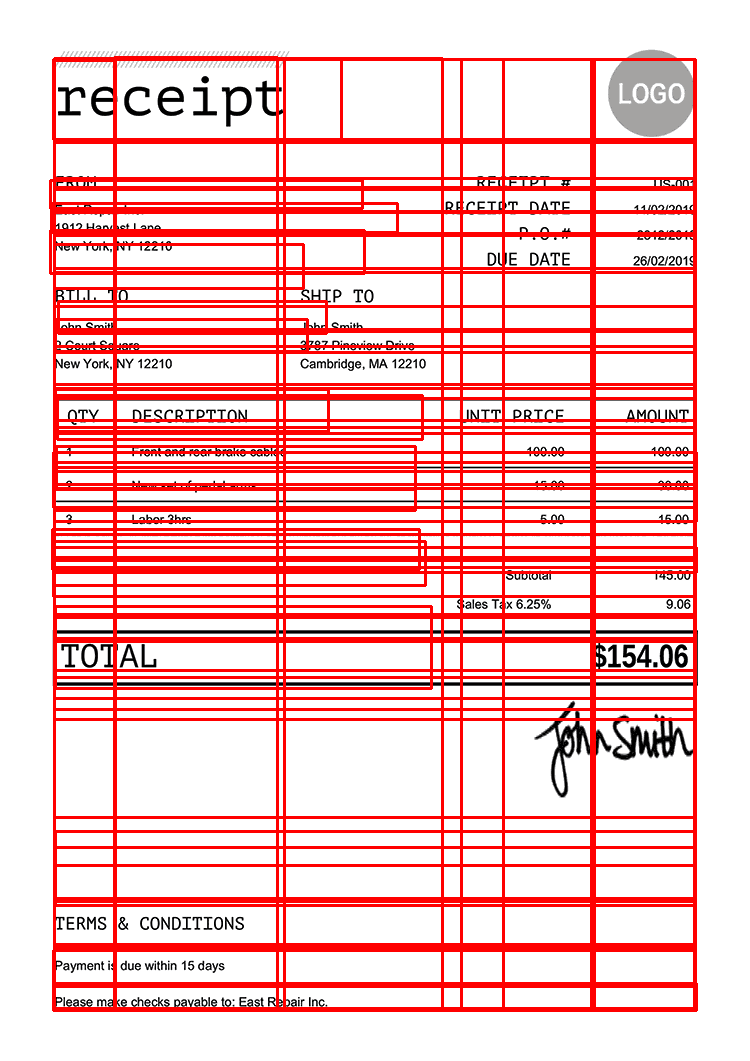

In [7]:
table_blocks = table_segmentation.process(image)
table_segments = [b for b in table_blocks if b.type != "Table"]

draw_box(image, table_segments, box_width=3)

In [9]:
for table_segment in table_segments:
    print(table_segment)

TextBlock(block=Rectangle(x_1=54.141082763671875, y_1=596.822509765625, x_2=695.3378295898438, y_2=638.1929321289062), text=, id=None, type=table row, parent=None, next=None, score=0.8805627822875977)
TextBlock(block=Rectangle(x_1=58.55023193359375, y_1=301.825439453125, x_2=326.02471923828125, y_2=333.87908935546875), text=, id=None, type=table spanning cell, parent=None, next=None, score=0.7371141314506531)
TextBlock(block=Rectangle(x_1=54.32362747192383, y_1=944.9219970703125, x_2=695.3683471679688, y_2=983.6419067382812), text=, id=None, type=table row, parent=None, next=None, score=0.9965080618858337)
TextBlock(block=Rectangle(x_1=54.269203186035156, y_1=212.23858642578125, x_2=695.242431640625, y_2=235.34730529785156), text=, id=None, type=table row, parent=None, next=None, score=0.9608829617500305)
TextBlock(block=Rectangle(x_1=53.2475700378418, y_1=547.486083984375, x_2=696.2694091796875, y_2=572.5192260742188), text=, id=None, type=table row, parent=None, next=None, score=0.86